In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [2]:
# Load audio file
audio_file = librosa.example('trumpet')  # You can replace this with your audio file
y, sr = librosa.load(audio_file)

In [4]:

# Compute MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

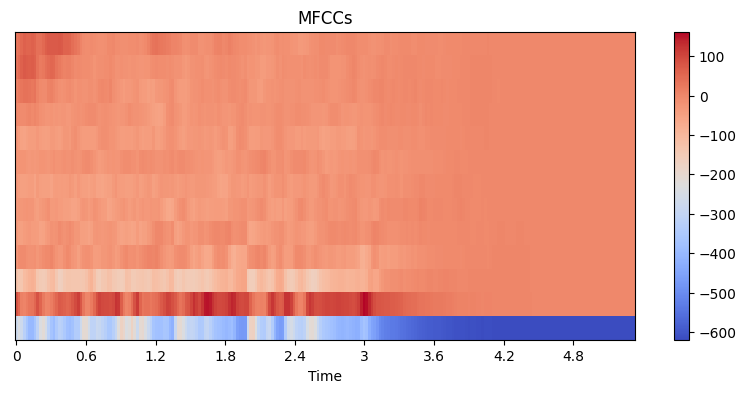

In [5]:
# Display the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.show()